<a href="https://colab.research.google.com/github/RayedShamim/Google-Play-Store-EDA-Rayed/blob/main/Google_Play_Store_EDA_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

# **GitHub Link -**

https://github.com/RayedShamim/Google-Play-Store-EDA-Rayed/blob/main/Google_Play_Store_EDA_Submission.ipynb

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

Google Play store is the most popular app store with over 3.5 million apps. The Play store generates billions of dollars in revenue which makes it the most competitive yet lucrative place for developers to upload apps.

In this app store, users can download apps from a variety of genres. Most of the apps on this appstore are free, yet many developers tend to add small adverts into the app or have an In-app purchase options which provides extra features and functionality to the user. This helps the developer to make money in return.

So, the greater number of positive reviews and installs an app will have, the greater chances a developer will make money. Also, we are going to see what are the key factors which helps in engagement of users in apps.

#### **Define Your Business Objective?**

**Increase user engagement in app**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from google.colab import drive

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [3]:
# Load Dataset

file1 = 'Play Store Data.csv'
file2 = 'User Reviews.csv'
working_path = '/content/drive/My Drive/Alma better/EDA Capstone/data/'
#psdf -> abbreviated for Play store dataframe
psdf = pd.read_csv(working_path + file1)

#urdf -> abbreviation for User Review Dataframe
urdf = pd.read_csv(working_path + file2)

### Dataset First View

In [ ]:
# Dataset First Look
psdf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
urdf.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(psdf.shape,urdf.shape)

(10841, 13) (64295, 5)


### Dataset Information

In [ ]:
# Dataset Info
psdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
urdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
urdf.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(psdf[psdf.duplicated()])

483

In [7]:
len(urdf[urdf['Translated_Review'].duplicated()])

36300

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
psdf.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
urdf.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

<Axes: >

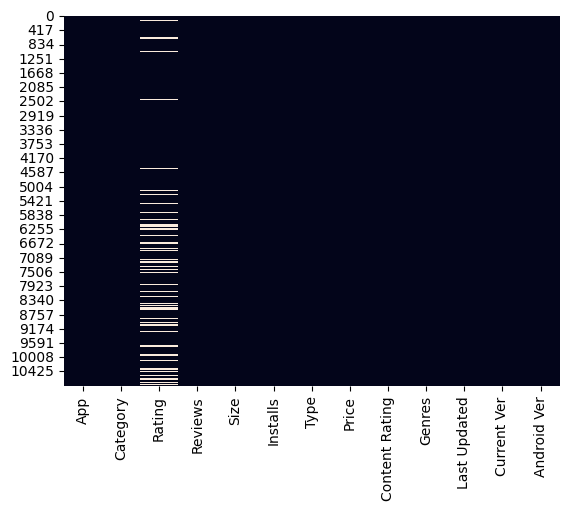

In [ ]:
# Visualizing the missing values
sns.heatmap(psdf.isnull(), cbar=False)

<Axes: >

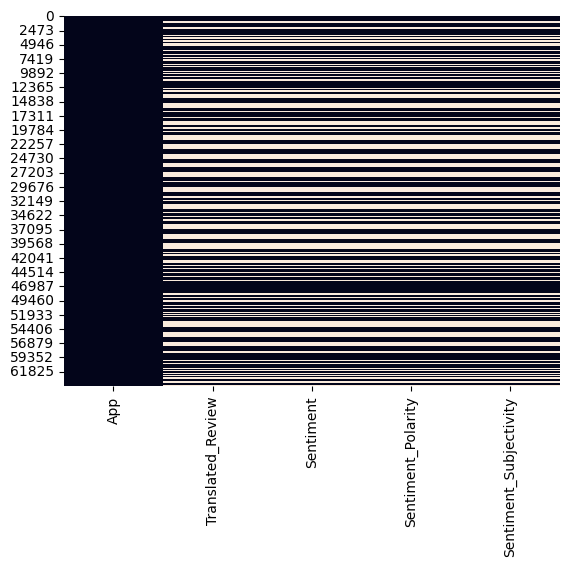

In [ ]:
sns.heatmap(urdf.isnull(), cbar=False)

### What did you know about your dataset?

This dataset is of google play store were users installs and ratings are given for each app. More positive ratings means more engagement of the user.

A positive rating is considered when a user rates an app 4 stars and above.
A neutral rating 

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
psdf.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
urdf.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
# Dataset Describe
psdf.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
urdf.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


### Variables Description 

###**Play Store Data**
* **App:** Name of the App
* **Category:** Category type the app belongs to
* **Rating:** Star ratings for the app
* **Rating:** Total number of reviews the app contains
* **Size:** Size of the app
* **Installs:** Total number of installs
* **Type:** Free/Paid
* **Price:** Price of the app
* **Content Rating:** Suitability for age group
* **Genres:** Genres of the app
* **Last Updated:** tell us how recently the app was updated
* **Current Ver:** Current version of the app apk/aab
* **Android Ver:** Minimum version of the Android OS supported by the app

###**User Reviews**
* **App:** Name of the app
* **Translated_Review:** Review given by the user translated in english
* **Sentiment:** Sentiment of the user(Positive, Negative or Neutral)
* **Sentiment_Polarity:** tells us how positive or negative a review is
* **Sentiment_Subjectivity:** tells us if the review sentiment leans more towards users personal believes or actual facts

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for cols in psdf:
  print(f'* The unique values in {cols} is {psdf[cols].unique()}.\n')

* The unique values in App is ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology'].

* The unique values in Category is ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9'].

* The unique values in Rating is [ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  

In [ ]:
# Checking unique values in urdf
for cols in urdf:
  print(f'* The unique number of values in column {cols} is {urdf[cols].nunique()}.\n')

* The unique values in App is 1074.

* The unique values in Translated_Review is 27994.

* The unique values in Sentiment is 3.

* The unique values in Sentiment_Polarity is 5410.

* The unique values in Sentiment_Subjectivity is 4474.



## 3. ***Data Wrangling***

### Data Wrangling Code

In [6]:
# Write your code to make your dataset analysis ready.
# Filtering out na values and removing duplicates
filtered_psdf = psdf.dropna(axis=0)
filtered_psdf = filtered_psdf.drop_duplicates('App')

filtered_urdf = urdf.dropna(axis=0)
filtered_urdf = filtered_urdf.drop_duplicates('Translated_Review')

In [ ]:
filtered_psdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8190 non-null   object 
 1   Category        8190 non-null   object 
 2   Rating          8190 non-null   float64
 3   Reviews         8190 non-null   object 
 4   Size            8190 non-null   object 
 5   Installs        8190 non-null   object 
 6   Type            8190 non-null   object 
 7   Price           8190 non-null   object 
 8   Content Rating  8190 non-null   object 
 9   Genres          8190 non-null   object 
 10  Last Updated    8190 non-null   object 
 11  Current Ver     8190 non-null   object 
 12  Android Ver     8190 non-null   object 
dtypes: float64(1), object(12)
memory usage: 895.8+ KB


<Axes: >

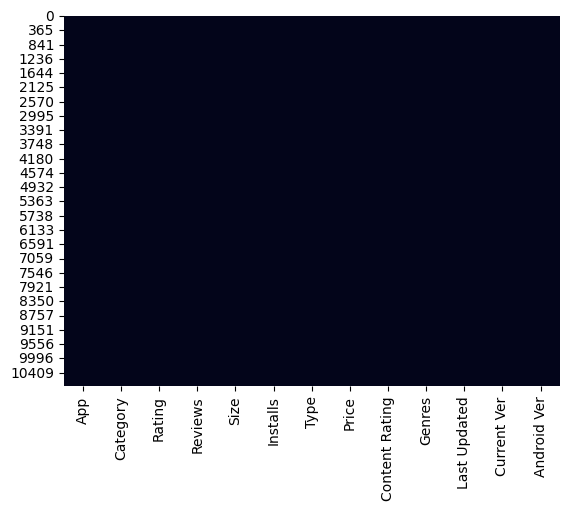

In [ ]:
# checking visually if there is any null values left
sns.heatmap(filtered_psdf.isnull(), cbar=False)

<Axes: >

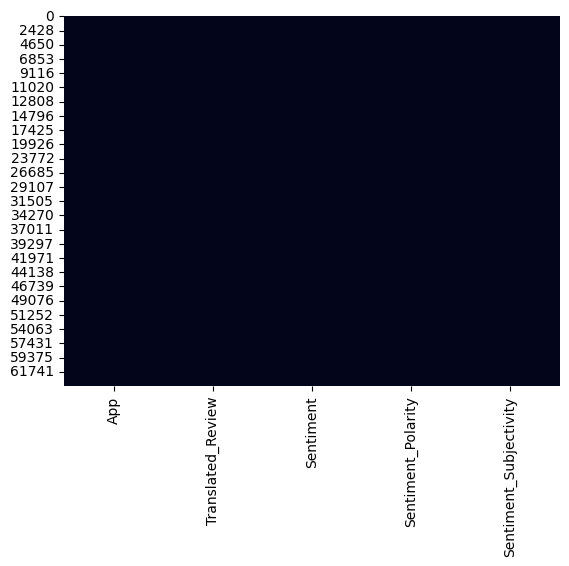

In [10]:
sns.heatmap(filtered_urdf.isnull(), cbar=False)

In [ ]:
# Filtering outliers
filtered_psdf = filtered_psdf[(filtered_psdf['Rating'] <= 5) & (filtered_psdf['Rating'] >= 0)]

In [ ]:
# finding top categories with highest total number number of apps
filtered_psdf['Category'].value_counts()

FAMILY                 1607
GAME                    912
TOOLS                   717
FINANCE                 302
PRODUCTIVITY            301
LIFESTYLE               301
PERSONALIZATION         296
MEDICAL                 290
BUSINESS                263
PHOTOGRAPHY             263
SPORTS                  260
COMMUNICATION           256
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           148
DATING                  134
MAPS_AND_NAVIGATION     118
EDUCATION               118
ENTERTAINMENT           102
FOOD_AND_DRINK           94
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       63
HOUSE_AND_HOME           62
ART_AND_DESIGN           60
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [ ]:
# Finding total number of reviews in each category
filtered_psdf.groupby('Category').agg({'Reviews':'sum'}).sort_values(by='Reviews',ascending=False)

,Reviews
Category,
GAME,622295937
COMMUNICATION,285810907
TOOLS,229351692
SOCIAL,227927470
FAMILY,143822125
PHOTOGRAPHY,105351227
VIDEO_PLAYERS,67484072
PRODUCTIVITY,55590391
PERSONALIZATION,53542336


In [ ]:
# Finding apps with highest average user engagement in top categories
filtered_psdf['Reviews'] = filtered_psdf['Reviews'].astype(int)

category_reivews = filtered_psdf.groupby('Category')['Reviews'].mean().reset_index()
category_reivews.rename(columns = {'Reviews':'avg_reviews'}, inplace=True)
category_reivews = category_reivews.sort_values('avg_reviews',ascending=False)
category_reivews

,Category,avg_reviews
27,SOCIAL,1.122795e+06
6,COMMUNICATION,1.116449e+06
14,GAME,6.823420e+05
31,VIDEO_PLAYERS,4.559735e+05
24,PHOTOGRAPHY,4.005750e+05
9,ENTERTAINMENT,3.408103e+05
29,TOOLS,3.198768e+05
26,SHOPPING,2.475086e+05
25,PRODUCTIVITY,1.846857e+05
23,PERSONALIZATION,1.808863e+05


In [ ]:
cat1 = {category_reivews['Category'].iloc[0]}
cat2 = {category_reivews['Category'].iloc[1]}
cat3 = {category_reivews['Category'].iloc[2]}
print(f'The top 3 categories with most number of reviews are {cat1}, {cat2} & {cat3}')

The top 3 categories with most number of reviews are {'SOCIAL'}, {'COMMUNICATION'} & {'GAME'}


In [ ]:
communication_df = filtered_psdf[filtered_psdf['Category'] == 'COMMUNICATION']
communication_df.sort_values(by = 'Reviews',ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40M,"500,000,000+",Free,0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
406,BBM - Free Calls & Messages,COMMUNICATION,4.3,12842860,Varies with device,"100,000,000+",Free,0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up
342,Viber Messenger,COMMUNICATION,4.3,11334799,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device


In [ ]:
social_df = filtered_psdf[filtered_psdf['Category'] == 'SOCIAL']
social_df.sort_values(by = 'Reviews',ascending=False).head(6)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2550,Snapchat,SOCIAL,4.0,17014787,Varies with device,"500,000,000+",Free,0,Teen,Social,"July 30, 2018",Varies with device,Varies with device
2546,Facebook Lite,SOCIAL,4.3,8606259,Varies with device,"500,000,000+",Free,0,Teen,Social,"August 1, 2018",Varies with device,Varies with device
6373,VK,SOCIAL,3.8,5793284,Varies with device,"100,000,000+",Free,0,Mature 17+,Social,"August 3, 2018",Varies with device,Varies with device
3945,Tik Tok - including musical.ly,SOCIAL,4.4,5637451,59M,"100,000,000+",Free,0,Teen,Social,"August 3, 2018",8.0.0,4.1 and up


In [ ]:
games_df = filtered_psdf[filtered_psdf['Category'] == 'GAME']
games_df.sort_values(by = 'Reviews',ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1670,Clash of Clans,GAME,4.6,44891723,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1660,Clash Royale,GAME,4.6,23133508,97M,"100,000,000+",Free,0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1722,My Talking Tom,GAME,4.5,14891223,Varies with device,"500,000,000+",Free,0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up


In [ ]:
def findMinimum(version):
  if 'and up' in version:
    version = float(version.replace('and up',''))
  elif 

In [ ]:
filtered_psdf['Minimum Android Ver'] = filtered_psdf['Android Ver'].apply(lambda x: findMinimum(x))

In [12]:
filtered_urdf['App'].value_counts().head(10)

Facebook                        129
Episode - Choose Your Story     123
Angry Birds Classic             107
Google Photos                   101
8fit Workouts & Meal Planner    100
Calorie Counter - Macros        100
ColorNote Notepad Notes          99
Adobe Acrobat Reader             98
Be A Legend: Soccer              98
DRAGON BALL LEGENDS              97
Name: App, dtype: int64

In [ ]:
l1 = []
for index,ele in enumerate(filtered_psdf['App']):
  if ele in urdf['App'].iloc[index]:
    l1.append(ele)

filtered_psdf[filtered_psdf['App'] == l1[0]]

# The only meaningful common value in both dfs is 'Contacts' app.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
348,Contacts,COMMUNICATION,4.3,66602,Varies with device,"50,000,000+",Free,0,Everyone,Communication,"June 26, 2018",2.8.4.201036949,5.0 and up


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***